In [ ]:
A cost function tells us how bad our model’s predictions are.
Lower cost = better model
Eg-Predicting house prices
    actual price=100
    prediction=90
    errors=100-90=10

y=Actual Value
y^=Predicted Value
Error=y-y^  (Error for 1 data point)
##Errors can be + or -. So they can cancel it other so we square them!

In [ ]:
Mean Squared Error
If we have 'n' datapoints, multiply the sum of squared errors with 1/n

In [8]:
import numpy as np
#We try to predict y = 2x

x=np.array([1,2,3,4])
y_actual=np.array([2,4,6,8])
y_predicted=np.array([1,2,3,4])

error=y_actual-y_predicted
squared_error = error**2
mse=np.mean(squared_error)
print(mse)  #prints how wrong the model is!

7.5


In [10]:
y_predicted=np.array([2,4,6,8]) #Perfect model
mse=np.mean((y_actual-y_predicted)**2)
print(mse)

0.0


In [11]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_actual,y_predicted)
print(mse)

0.0


In [ ]:
Why MSE is not enough?
It gives numbers like 7.5, 0.0 but out of what, means there is no scale!

Replacement: R^2
It gives how much of variation in Y is explained by the model

Eg- To predict students height without any features, calculating the average of all gives a lot of errors

In [13]:
x=np.array([1,2,3,4,5])
y=np.array([2,4,5,4,5])

from sklearn.linear_model import LinearRegression
x=x.reshape(-1,1)
lr=LinearRegression()
lr.fit(x,y)

y_pred=lr.predict(x)

In [14]:
from sklearn.metrics import r2_score
r2=r2_score(y,y_pred)
print(r2)

0.6000000000000001


In [ ]:
Problem with R2
It always increases, this causes overfitting

Eg- when predicting marks, features like study hours affect marks
    but if we add roll number, shoe size, favorite color
    Modeal says "Oh wow! with all this I can predict marks Perfectly!"
This is Overfitting, when a model learns useless details instead of real patterns

In [ ]:
R2 always keeps increasing and increasing
Adjusted R2 checks if increasing is better or not

R² increases with more features
Adjusted R² increases only if the feature is meaningful

In [21]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

x_real=np.array([[1],[2],[3],[4],[5]])
y=np.array([3,6,9,12,15])

#y depends only on x_real
#creating useless features x_noise

x_noise=np.array([[10],[3],[7],[9],[1]])
#combining both features
X=np.hstack((x_real,x_noise))

#training model with one useful feature
model1=LinearRegression()
model1.fit(x_real,y)
r2_1=r2_score(y,model1.predict(x_real))
print("R2 with one useful feature",r2_1)

R2 with one useful feature 1.0


In [22]:
model2=LinearRegression()
model2.fit(x_noise,y)
r2_2=r2_score(y,model2.predict(x_noise))
print("R2 with noise features",r2_2)

R2 with noise features 0.2400000000000001


In [23]:
def adjusted_r2(r2, n, p):
    return 1 - (1 - r2) * (n - 1) / (n - p - 1)

n = len(y)

adj1 = adjusted_r2(r2_1, n, 1)
adj2 = adjusted_r2(r2_2, n, 2)

print("Adjusted R2 (1 feature):", adj1)
print("Adjusted R2 (with noise):", adj2)

Adjusted R2 (1 feature): 1.0
Adjusted R2 (with noise): -0.5199999999999998


In [ ]:
How to find the best-fit line?
we have many points on a graph and infinite lines can be drawn
the best-fit line is the one which passes closest to all points and has minimum total squared error

Line eq: y=mx+c
Our job is to find the best values of 'm' and 'c'

In [25]:
x=np.array([1,2,3,4,5])
y=np.array([2,4,5,4,5])
from sklearn.linear_model import LinearRegression

x=x.reshape(-1,1)
lr=LinearRegression()
lr.fit(x,y)
print("m=",lr.coef_[0])
print("c=",lr.intercept_)

m= 0.6000000000000002
c= 2.1999999999999993


In [ ]:
WHY REGULARIZATION IS NEEDED?
Best fit line minimizes error but sometimes it becomes too steep/complex when 
~too many features
~small dataset
~noise in data

Regularization controls the model
~penalize large coefficients(slope)
~force the model to stay simple

In [ ]:
RIDGE REGRESSION [L2]
the model can use all features but dont give any feature too much power
graphs with ridge have smooth curves

LASSO REGRESSION [L1]
if a feature is useless remove it
feature selection happens automatically

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso

X = np.array([[1], [2], [3], [4], [5]])
y = np.array([2, 4, 5, 4, 5])

In [27]:
lr = LinearRegression()
ridge = Ridge(alpha=5)    # L2 regularization
lasso = Lasso(alpha=0.5) # L1 regularization

In [28]:
lr.fit(X, y)
ridge.fit(X, y)
lasso.fit(X, y)

Lasso(alpha=0.5)

In [29]:
x_line = np.linspace(1, 5, 100).reshape(-1, 1)

y_lr = lr.predict(x_line)
y_ridge = ridge.predict(x_line)
y_lasso = lasso.predict(x_line)

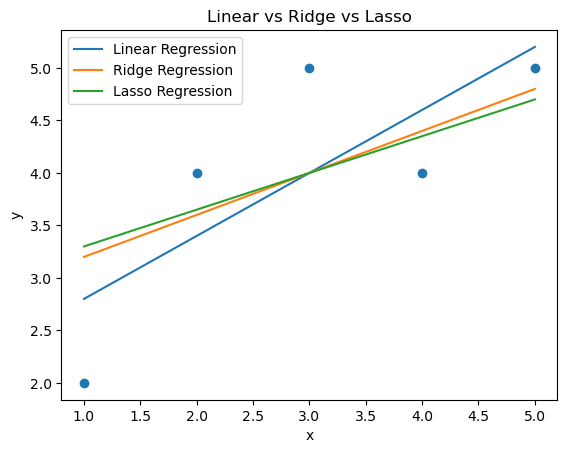

In [30]:
plt.figure()
plt.scatter(X, y)                     # actual points
plt.plot(x_line, y_lr, label="Linear Regression")
plt.plot(x_line, y_ridge, label="Ridge Regression")
plt.plot(x_line, y_lasso, label="Lasso Regression")

plt.xlabel("x")
plt.ylabel("y")
plt.title("Linear vs Ridge vs Lasso")
plt.legend()
plt.show()

In [31]:
print("Linear slope:", lr.coef_[0])
print("Ridge slope:", ridge.coef_[0])
print("Lasso slope:", lasso.coef_[0])

Linear slope: 0.6000000000000002
Ridge slope: 0.4
Lasso slope: 0.35


In [ ]:
Linear Regression → fit data only
Ridge (L2) → fit data + control slope
Lasso (L1) → fit data + remove useless features